In [1]:
%matplotlib inline
import networkx as nx
#import pygraphviz
import pyparsing
import numpy as np
import matplotlib.pylab as plt

from IPython.display import Math

np.set_printoptions(precision=5, suppress=True)

/Users/semihakbayrak/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
from HiddenMarkovModel import HMM

In [5]:
S = 10 #number of states
A = np.zeros((S,S))
B = np.zeros((S,S))
p0 = np.ones(S)/S
for i in range(S):
    for j in range(S):
        if i == j:
            A[i,j] = 0.9
        else:
            A[i,j] = 0.1/(S-1)
for i in range(S):
    for j in range(S):
        if i == j:
            B[i,j] = 0.4
        else:
            B[i,j] = 0.6/(S-1)

In [6]:
hmm = HMM(p0,A,B)

In [36]:
obsseq, realseq = hmm.generate_sequence(100)
print obsseq
print realseq

[1 7 4 8 8 4 8 8 4 3 7 5 0 1 8 4 2 8 8 8 6 8 6 8 8 9 8 9 4 8 3 5 5 2 2 2 5
 2 2 2 2 4 6 8 3 3 2 6 5 6 6 6 3 6 6 7 7 3 2 5 3 8 3 0 3 1 4 4 7 3 0 3 7 3
 4 3 4 6 9 4 7 7 8 8 1 1 7 1 3 2 3 5 0 2 3 3 6 6 4 7]
[8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 4 4 4 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 6 6 6 6 6 6 6 6 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 8 8 8 8 8 8 8 8 8 8 8 1 3 3 3 3 3 3 3 3 3 3 3 3]


In [37]:
t = []
for i in range(100):
    t.append(i)

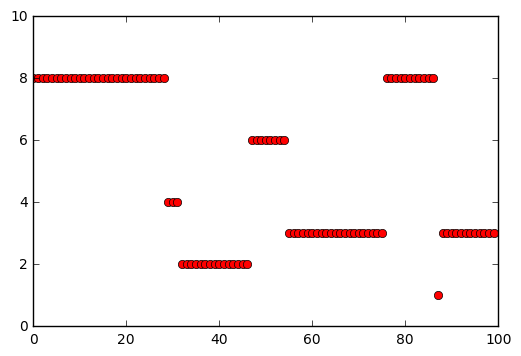

In [38]:
plt.plot(t, realseq, 'ro')
plt.axis([0,100,0,10])
plt.show()

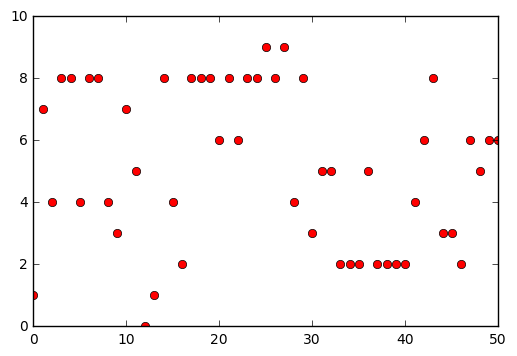

In [39]:
plt.plot(t, obsseq, 'ro')
plt.axis([0,50,0,10])
plt.show()

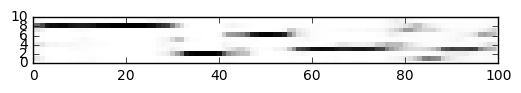

In [44]:
def normalize_exp(log_P, axis=None):
    a = np.max(log_P, keepdims=True, axis=axis)
    P = normalize(np.exp(log_P - a), axis=axis)
    return P

def normalize(A, axis=None):
    Z = np.sum(A, axis=axis,keepdims=True)
    idx = np.where(Z == 0)
    Z[idx] = 1
    return A/Z

log_gamma = hmm.forward_backward_smoother(obsseq)
gam = normalize_exp(log_gamma)
plt.imshow(gam, interpolation='nearest', cmap='gray_r')
plt.axis([0,100,10,0])
plt.gca().invert_yaxis()
plt.show()